In [1]:
# My Mnist CNN
# Conv2D - ReLU - MaxPooling - Dence - ReLU - Dence
# 2018/05/25 by marsee
# Keras / Tensorflowで始めるディープラーニング入門 https://qiita.com/yampy/items/706d44417c433e68db0d
# のPythonコードを再利用させて頂いている

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

img_rows, img_cols = 28, 28

(x_train, y_train), (x_test, y_test) = mnist.load_data()

#Kerasのバックエンドで動くTensorFlowとTheanoでは入力チャンネルの順番が違うので場合分けして書いています
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train = y_train.astype('int32')
y_test = y_test.astype('int32')
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test =  keras.utils.np_utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(10, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,
          verbose=1, validation_data=(x_test, y_test))

Using TensorFlow backend.


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 12s 205us/step - loss: 0.2611 - acc: 0.9222 - val_loss: 0.0940 - val_acc: 0.9728
Epoch 2/12
60000/60000 [==============================] - 12s 195us/step - loss: 0.0734 - acc: 0.9769 - val_loss: 0.0547 - val_acc: 0.9829
Epoch 3/12
60000/60000 [==============================] - 12s 194us/step - loss: 0.0529 - acc: 0.9842 - val_loss: 0.0463 - val_acc: 0.9844
Epoch 4/12
60000/60000 [==============================] - 12s 192us/step - loss: 0.0410 - acc: 0.9875 - val_loss: 0.0357 - val_acc: 0.9881
Epoch 5/12
60000/60000 [==============================] - 11s 192us/step - loss: 0.0344 - acc: 0.9898 - val_loss: 0.0368 - val_acc: 0.9878
Epoch 6/12
60000/60000 [==============================] - 12s 199us/step - loss: 0.0294 - acc: 0.9910 - val_loss: 0.0371 - val_acc: 0.9877
Epoch 7/12
60000/60000 [===================

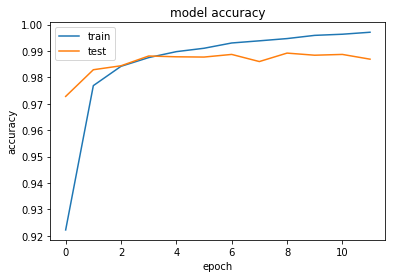

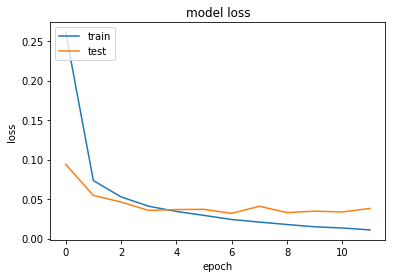

In [2]:
# Keras / Tensorflowで始めるディープラーニング入門 https://qiita.com/yampy/items/706d44417c433e68db0d
# のPythonコードを再利用させて頂いている

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# plot the loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [35]:
# 学習済みモデルの保存

from keras.models import load_model

model.save('mnist_cnn10_model.h5') # creates a HDF5 file 'my_model.h5'
with open('mnist_cnn10_model.json', 'w') as fout:
    fout.write(model.to_json())

In [4]:
del model # deletes the existing model

In [23]:
# 学習済みモデルの読み込み

from keras.models import load_model

model = load_model('mnist_cnn10_model.h5')
model_list = model.get_weights()
print(model_list)

from keras.utils.vis_utils import plot_model
model.summary()
plot_model(model, show_shapes=True, to_file='./model.png')


[array([[[[ 1.22345015e-01,  2.56660312e-01, -9.14000273e-02,
           1.84590705e-02,  1.83088735e-01, -1.43982157e-01,
          -3.90010715e-01,  3.60945165e-01,  2.74779797e-01,
          -1.75163954e-01]],

        [[ 1.43529639e-01,  4.01860744e-01, -3.53339404e-01,
          -1.10209912e-01,  6.43292293e-02,  6.21640608e-02,
          -3.52487028e-01,  3.98208588e-01,  2.71519184e-01,
          -1.53633222e-01]],

        [[ 1.27123460e-01,  1.37299210e-01, -4.83618945e-01,
           2.36388929e-02,  4.18492220e-02,  1.34286702e-01,
          -4.45628285e-01,  1.97014865e-03,  2.38492489e-01,
           6.00318052e-02]],

        [[-2.40886569e-01, -1.21689826e-01, -3.60769182e-01,
          -2.81019777e-01, -3.61169726e-01,  9.57925394e-02,
          -1.62243664e-01, -3.37103933e-01,  1.55454859e-01,
           1.93938807e-01]],

        [[-1.38306335e-01, -1.61716521e-01, -1.80341095e-01,
          -3.05977881e-01, -2.66153038e-01,  3.39813903e-02,
          -4.25571343e-05

ImportError: Failed to import `pydot`. Please install `pydot`. For example with `pip install pydot`.

In [24]:
# My Mnist CNN (Convolution layerの特徴マップは5個)
# Conv2D - ReLU - MaxPooling - Dence - ReLU - Dence
# 2018/05/25 by marsee
# Keras / Tensorflowで始めるディープラーニング入門 https://qiita.com/yampy/items/706d44417c433e68db0d
# のPythonコードを再利用させて頂いている

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Activation
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

img_rows, img_cols = 28, 28

(x_train, y_train), (x_test, y_test) = mnist.load_data()

#Kerasのバックエンドで動くTensorFlowとTheanoでは入力チャンネルの順番が違うので場合分けして書いています
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train = y_train.astype('int32')
y_test = y_test.astype('int32')
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test =  keras.utils.np_utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(10, kernel_size=(5, 5),
                 input_shape=input_shape))
model.add(Activation(activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(100))
model.add(Activation(activation='relu'))
model.add(Dense(num_classes))
model.add(Activation(activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,
          verbose=1, validation_data=(x_test, y_test))

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 13s 211us/step - loss: 0.2839 - acc: 0.9151 - val_loss: 0.1083 - val_acc: 0.9677
Epoch 2/12
60000/60000 [==============================] - 12s 206us/step - loss: 0.0833 - acc: 0.9758 - val_loss: 0.0620 - val_acc: 0.9796
Epoch 3/12
60000/60000 [==============================] - 12s 198us/step - loss: 0.0563 - acc: 0.9834 - val_loss: 0.0538 - val_acc: 0.9820
Epoch 4/12
60000/60000 [==============================] - 12s 196us/step - loss: 0.0429 - acc: 0.9873 - val_loss: 0.0390 - val_acc: 0.9876
Epoch 5/12
60000/60000 [==============================] - 12s 193us/step - loss: 0.0339 - acc: 0.9899 - val_loss: 0.0389 - val_acc: 0.9875
Epoch 6/12
60000/60000 [==============================] - 12s 198us/step - loss: 0.0287 - acc: 0.9916 - val_loss: 0.0455 - val_acc: 0.9837
Epoch 7/12
60000/60000 [===================

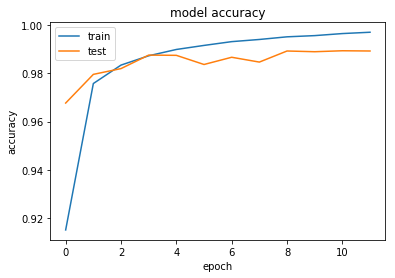

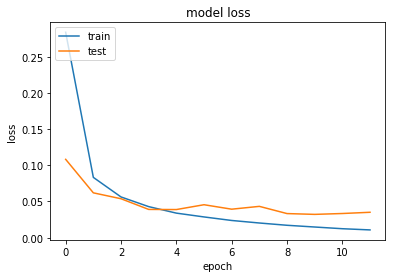

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 24, 24, 10)        260       
_________________________________________________________________
activation_1 (Activation)    (None, 24, 24, 10)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 10)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1440)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               144100    
_________________________________________________________________
activation_2 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
__________

In [26]:
# Keras / Tensorflowで始めるディープラーニング入門 https://qiita.com/yampy/items/706d44417c433e68db0d
# のPythonコードを再利用させて頂いている

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# plot the loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

model.summary()

10000/10000 [==============================] - 1s 114us/step
(5, 5, 1, 10)
(10, 1, 5, 5)
(10,)
np.max(conv_layer_weight) = 0.48553982377052307
np.min(conv_layer_weight) = -0.6727417707443237
np.max(abs_conv_layer_weight) = 0.6727417707443237
np.min(abs_conv_layer_weight) = 4.9058478907682e-05
np.max(conv_layer_bias) = 0.006612294353544712
np.min(conv_layer_bias) = -0.18756724894046783
np.max(abs_conv_layer_bias) = 0.18756724894046783
np.min(abs_conv_layer_bias) = 0.0007986584096215665
conv_output = (10000, 24, 24, 10)
np.std(conv_output) = 0.7609626650810242
np.max(conv_output) = 3.070563793182373
np.min(conv_output) = -5.251377582550049
np.max(abs_conv) = 5.251377582550049
np.min(abs_conv) = 4.470348358154297e-08


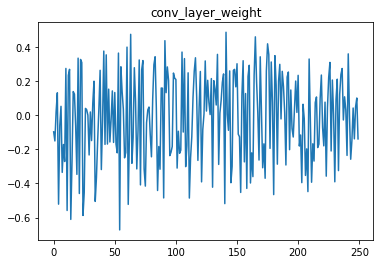

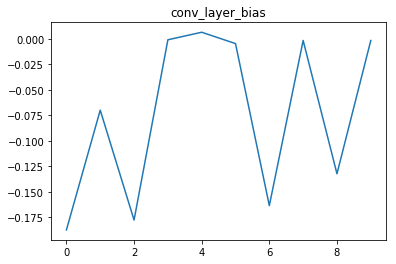

In [33]:
# Convolution layerの中間出力を取り出す 
from keras.models import Model
import numpy as np

conv_layer_name = 'conv2d_2'

conv_layer = model.get_layer(conv_layer_name)
conv_layer_wb = conv_layer.get_weights()

conv_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer(conv_layer_name).output)
conv_output = conv_layer_model.predict(x_test, verbose=1)

conv_layer_weight = conv_layer_wb[0]
conv_layer_bias = conv_layer_wb[1]

print(conv_layer_weight.shape)
print(conv_layer_weight.T.shape)
print(conv_layer_bias.shape)

print("np.max(conv_layer_weight) = {0}".format(np.max(conv_layer_weight)))
print("np.min(conv_layer_weight) = {0}".format(np.min(conv_layer_weight))) 
abs_conv_layer_weight = np.absolute(conv_layer_weight)
print("np.max(abs_conv_layer_weight) = {0}".format(np.max(abs_conv_layer_weight)))
print("np.min(abs_conv_layer_weight) = {0}".format(np.min(abs_conv_layer_weight))) 

print("np.max(conv_layer_bias) = {0}".format(np.max(conv_layer_bias)))
print("np.min(conv_layer_bias) = {0}".format(np.min(conv_layer_bias))) 
abs_conv_layer_bias = np.absolute(conv_layer_bias)
print("np.max(abs_conv_layer_bias) = {0}".format(np.max(abs_conv_layer_bias)))
print("np.min(abs_conv_layer_bias) = {0}".format(np.min(abs_conv_layer_bias))) 

print("conv_output = {0}".format(conv_output.shape))
print("np.std(conv_output) = {0}".format(np.std(conv_output)))
print("np.max(conv_output) = {0}".format(np.max(conv_output)))
print("np.min(conv_output) = {0}".format(np.min(conv_output))) 

abs_conv_output = np.absolute(conv_output)
print("np.max(abs_conv) = {0}".format(np.max(abs_conv_output)))
print("np.min(abs_conv) = {0}".format(np.min(abs_conv_output))) 

# Convolution layerのweightのグラフ
conv_layer_weight_f = conv_layer_weight.flatten()
plt.plot(conv_layer_weight_f)
plt.title('conv_layer_weight')
plt.show()

# Convolution layerのbiasのグラフ
conv_layer_bias_f = conv_layer_bias.flatten()
plt.plot(conv_layer_bias_f)
plt.title('conv_layer_bias')
plt.show()


In [34]:
# 畳み込み層の重みをCヘッダファイルに書き出す
# 2018/05/31 by marsee

def fwrite_conv_weight(weight, wfile_name, float_wt_name, fixed_wt_name, MAGNIFICATION):
    import datetime
    import numpy as np
    
    f = open(wfile_name, 'w')
    todaytime = datetime.datetime.today()
    f.write('// '+wfile_name+'\n')
    strdtime = todaytime.strftime("%Y/%m/%d %H:%M:%S")
    f.write('// {0} by marsee\n'.format(strdtime))
    f.write("\n")
    
    f.write('const float '+float_wt_name+'['+str(weight.shape[0])+']['+str(weight.shape[1])+']['+str(weight.shape[2])+']['+str(weight.shape[3])+'] = \n{\n')
    for i in range(weight.shape[0]):
        f.write("\t{\n")
        for j in range(weight.shape[1]):
            f.write("\t\t{\n")
            for k in range(weight.shape[2]):
                f.write("\t\t\t{")
                for m in range(weight.shape[3]):
                    f.write(str(weight[i][j][k][m]))
                    if (m==weight.shape[3]-1):
                        f.write("}")
                    else:
                        f.write(",")
                
                if (k==weight.shape[2]-1):
                    f.write("\n\t\t}\n")
                else:
                    f.write(",\n")

            if (j==weight.shape[1]-1):
                f.write("\t}\n")
            else:
                f.write(",\n")
        
        
        if (i==weight.shape[0]-1):
            f.write("};\n")
        else:
            f.write("\t,\n")

    f.write("\n")
    f.write('const ap_fixed<'+str(int(np.log2(MAGNIFICATION))+1)+', 1, AP_TRN_ZERO, AP_SAT> '+fixed_wt_name+'['+str(weight.shape[0])+']['+str(weight.shape[1])+']['+str(weight.shape[2])+']['+str(weight.shape[3])+'] = \n{\n')
    for i in range(weight.shape[0]):
        f.write("\t{\n")
        for j in range(weight.shape[1]):
            f.write("\t\t{\n")
            for k in range(weight.shape[2]):
                f.write("\t\t\t{")
                for m in range(weight.shape[3]):
                    w_int = int(weight[i][j][k][m]*MAGNIFICATION+0.5)
                    if (w_int > MAGNIFICATION-1):
                        w_int = MAGNIFICATION-1
                    elif (w_int < -MAGNIFICATION):
                        w_int = -MAGNIFICATION
                    f.write(str(float(w_int)/float(MAGNIFICATION)))
                    if (m==weight.shape[3]-1):
                        f.write("}")
                    else:
                        f.write(",")
                
                if (k==weight.shape[2]-1):
                    f.write("\n\t\t}\n")
                else:
                     f.write(",\n")

            if (j==weight.shape[1]-1):
                f.write("\t}\n")
            else:
                f.write(",\n")
        
        
        if (i==weight.shape[0]-1):
            f.write("};\n")
        else:
            f.write("\t,\n")
 
    f.close()

MAGNIFICATION_CONV = 2 ** (9-1)
fwrite_conv_weight(conv_layer_weight.transpose(3,2,0,1), 'conv1_weight10.h', 'conv1_fweight', 'conv1_weight', MAGNIFICATION_CONV)

